# Loan Dataset - Preprocessing

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'/content'

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Loan Dataset/Loan.csv')
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
data.shape

(121856, 40)

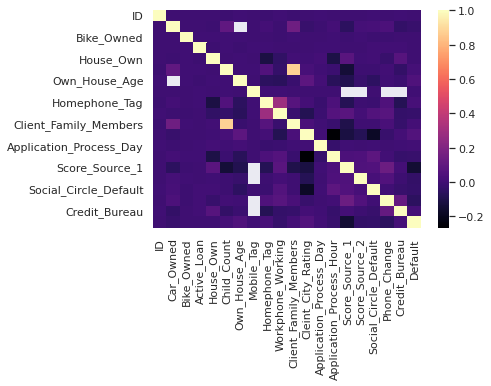

In [5]:
sns.heatmap(data.corr(), cmap='magma', cbar=True)

There are no correlations worth exploring. We thus move on with the Exploratory Data Analysis.

We drop columns that we are not interested in and those which do not relate directly with the default:

In [6]:
cols_drop = ['ID','Accompany_Client','Client_Education','Client_Marital_Status','Client_Housing_Type','Client_Gender',
             'Age_Days','Registration_Days','ID_Days','Own_House_Age','Mobile_Tag','Homephone_Tag',
             'Workphone_Working','Application_Process_Day','Application_Process_Hour','Client_Permanent_Match_Tag',
             'Client_Contact_Work_Tag','Score_Source_1','Social_Circle_Default','Type_Organization']
data.drop(cols_drop, axis=1, inplace=True)
data.shape

(121856, 20)

In [7]:
data.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,119446.000000,119447.000000,116170.000000,118192.000000,103316.000000,121856.000000
mean,0.342854,0.332262,0.499175,0.692060,0.417779,2.154329,2.030038,0.518625,962.106056,1.891082,0.080792
std,0.474665,0.471026,0.500001,0.461644,0.728802,0.912686,0.504407,0.740248,827.976726,1.861921,0.272517
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000005,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.390164,272.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.564978,755.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.664011,1570.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,16.000000,3.000000,100.000000,4185.000000,22.000000,1.000000


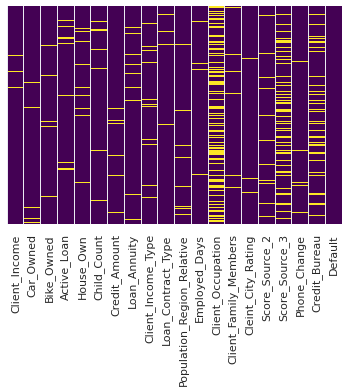

In [8]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels = False, xticklabels =  1)

We notice that there are a lot of missing values in three columns namely, *Client_Occupation, Score_Source_3  and Client_Bureau*.

In [9]:
data.isna().sum()

Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Client_Income_Type             3701
Loan_Contract_Type             3651
Population_Region_Relative     4857
Employed_Days                  3649
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Score_Source_2                 5686
Score_Source_3                26921
Phone_Change                   3664
Credit_Bureau                 18540
Default                           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Client_Income_Type          118155 non-null  object 
 9   Loan_Contract_Type          118205 non-null  object 
 10  Population_Region_Relative  116999 non-null  object 
 11  Employed_Days               118207 non-null  object 
 12  Client_Occupation           80421 non-null   object 
 13  Client_Family_

In [11]:
pd.options.display.max_columns = None
data.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Loan_Contract_Type,Population_Region_Relative,Employed_Days,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,CL,0.028663,1062,Sales,2.0,2.0,0.478787,NaN,63.0,NaN,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,CL,0.008575,4129,NaN,2.0,2.0,0.215068,NaN,NaN,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,CL,0.0228,5102,Realty agents,2.0,2.0,0.552795,0.329655,277.0,0.0,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,CL,0.010556,365243,NaN,2.0,3.0,0.135182,0.631355,1700.0,3.0,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,CL,0.020713,2977,Laborers,4.0,1.0,0.301182,0.355639,674.0,1.0,0


We first tackle the columns whose datatype is 'object'.

In [12]:
print('Client_Income Uniques: \n', data['Client_Income'].unique())
print('Credit_Amount Uniques: \n', data['Credit_Amount'].unique())
print('Loan_Annuity Uniques: \n', data['Loan_Annuity'].unique())
print('Client_Income_Type Uniques: \n', data['Client_Income_Type'].unique())
print('Loan_Contract_Type Uniques: \n', data['Loan_Contract_Type'].unique())
print('Population_Region_Relative Uniques: \n', data['Population_Region_Relative'].unique())
print('Employed_Days Uniques: \n', data['Employed_Days'].unique())
print('Client_Occupation Uniques: \n', data['Client_Occupation'].unique())
print('Score_Source_3 Uniques: \n', data['Score_Source_3'].unique())

Client_Income Uniques: 
 ['6750' '20250' '18000' ... '13140' '9764.1' '12840.75']
Credit_Amount Uniques: 
 ['61190.55' '15282' '59527.35' ... '89138.7' '88885.8' '135534.6']
Loan_Annuity Uniques: 
 ['3416.85' '1826.55' '2788.2' ... 1736.55 3388.05 2989.35]
Client_Income_Type Uniques: 
 ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Loan_Contract_Type Uniques: 
 ['CL' 'RL' nan]
Population_Region_Relative Uniques: 
 ['0.028663' '0.008575' '0.0228' '0.010556' '0.020713' '0.019101'
 '0.016612' '0.009175' '0.006008' '0.001417' '0.018634' '0.00963'
 '0.003541' '0.008068' '0.005144' '0.04622' '0.008866' nan '0.019689'
 '0.032561' '0.006852' '0.020246' '0.035792' '0.010147' '0.018801'
 '0.00733' '0.010276' '0.015221' '0.01452' '0.018209' '0.010006'
 '0.072508' '0.026392' '0.006671' '0.018029' '0.00496' '0.014464'
 '0.007114' '0.00712' '0.0105' '0.008019' '0.031329' '0.008474' '0.010643'
 '0.011657' '0.003069' '0.022625' '0.006305' '0.0

We now deal with the columns of datatype object that are actually numerical in nature:

In [13]:
data['Client_Income'] = data['Client_Income'].astype(str)
data['Client_Income'] = data['Client_Income'].str.replace('$', '0', regex=False)

In [14]:
data['Client_Income'] = data['Client_Income'].astype(float)

In [15]:
data['Credit_Amount'] = data['Credit_Amount'].astype(str)
data['Credit_Amount'] = data['Credit_Amount'].str.replace('$', '0', regex=False)

In [16]:
data['Credit_Amount'] = data['Credit_Amount'].astype(float)

In [17]:
data['Loan_Annuity'] = data['Loan_Annuity'].astype(str)
data['Loan_Annuity'] = data['Loan_Annuity'].str.replace('$', '0', regex=False)
data['Loan_Annuity'] = data['Loan_Annuity'].str.replace('#VALUE!', '0', regex=False)

In [18]:
data['Loan_Annuity'] = data['Loan_Annuity'].astype(float)

In [19]:
data['Population_Region_Relative'] = data['Population_Region_Relative'].astype(str)
data['Population_Region_Relative'] = data['Population_Region_Relative'].str.replace('@', '0', regex=False)
data['Population_Region_Relative'] = data['Population_Region_Relative'].str.replace('#', '0', regex=False)

In [20]:
data['Population_Region_Relative'] = data['Population_Region_Relative'].astype(float)

In [21]:
data['Employed_Days'] = data['Employed_Days'].astype(str)
data['Employed_Days'] = data['Employed_Days'].str.replace('x', '0', regex=False)

In [22]:
data['Employed_Days'] = data['Employed_Days'].astype(float)

In [23]:
data['Score_Source_3'] = data['Score_Source_3'].astype('str')
data['Score_Source_3'] = data['Score_Source_3'].str.replace('&', '0', regex=False)

In [24]:
data['Score_Source_3'] = data['Score_Source_3'].astype(float)

Check if all the features are numerical:

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  float64
 7   Loan_Annuity                117044 non-null  float64
 8   Client_Income_Type          118155 non-null  object 
 9   Loan_Contract_Type          118205 non-null  object 
 10  Population_Region_Relative  116999 non-null  float64
 11  Employed_Days               118207 non-null  float64
 12  Client_Occupation           80421 non-null   object 
 13  Client_Family_

In [26]:
data.isna().sum()

Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Client_Income_Type             3701
Loan_Contract_Type             3651
Population_Region_Relative     4857
Employed_Days                  3649
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Score_Source_2                 5686
Score_Source_3                26921
Phone_Change                   3664
Credit_Bureau                 18540
Default                           0
dtype: int64

Before we move further, we remove the target, *Default* since any further imputations may affect the target column:



In [27]:
y = data['Default']
from collections import Counter
Counter(y)

Counter({0: 112011, 1: 9845})

The dataset is NOT Balanced.

We drop the Default Column:

In [28]:
data.drop('Default', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  float64
 7   Loan_Annuity                117044 non-null  float64
 8   Client_Income_Type          118155 non-null  object 
 9   Loan_Contract_Type          118205 non-null  object 
 10  Population_Region_Relative  116999 non-null  float64
 11  Employed_Days               118207 non-null  float64
 12  Client_Occupation           80421 non-null   object 
 13  Client_Family_

We change the '0' values to null values in the columns *Client_Income, Credit_Amount, Loan_Annuity, Score_Source_3, Employed_Days and Population_Region_Relative*:

In [29]:
data.loc[data['Client_Income'] == 0] = np.nan
data.loc[data['Credit_Amount'] == 0] = np.nan
data.loc[data['Loan_Annuity'] == 0] = np.nan
data.loc[data['Score_Source_3'] == 0] = np.nan
data.loc[data['Employed_Days'] == 0] = np.nan
data.loc[data['Population_Region_Relative'] == 0] = np.nan

In [30]:
data.isnull().sum()

Client_Income                  3670
Car_Owned                      3646
Bike_Owned                     3689
Active_Loan                    3698
House_Own                      3723
Child_Count                    3701
Credit_Amount                  3696
Loan_Annuity                   4876
Client_Income_Type             3764
Loan_Contract_Type             3712
Population_Region_Relative     4922
Employed_Days                  3714
Client_Occupation             41476
Client_Family_Members          2473
Cleint_City_Rating             2469
Score_Source_2                 5748
Score_Source_3                26976
Phone_Change                   3726
Credit_Bureau                 18599
dtype: int64

We convert the categorical variables into numerical:

In [31]:
dummies = pd.get_dummies(data[['Client_Income_Type', 'Client_Occupation', 'Loan_Contract_Type']], drop_first = True)
dummies.head()

,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Loan_Contract_Type_RL
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
dummies_data = pd.concat([dummies, data], axis = 1)
dummies_data.head()

,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Loan_Contract_Type_RL,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Loan_Contract_Type,Population_Region_Relative,Employed_Days,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,CL,0.028663,1062.0,Sales,2.0,2.0,0.478787,NaN,63.0,NaN
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,CL,0.008575,4129.0,NaN,2.0,2.0,0.215068,NaN,NaN,NaN
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,CL,0.022800,5102.0,Realty agents,2.0,2.0,0.552795,0.329655,277.0,0.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,CL,0.010556,365243.0,NaN,2.0,3.0,0.135182,0.631355,1700.0,3.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,CL,0.020713,2977.0,Laborers,4.0,1.0,0.301182,0.355639,674.0,1.0


In [33]:
dummies_data.drop(['Client_Income_Type', 'Client_Occupation', 'Loan_Contract_Type'], axis=1, inplace=True)
dummies_data.shape

(121856, 41)

In [34]:
dummies_data.columns.values

array(['Client_Income_Type_Commercial', 'Client_Income_Type_Govt Job',
       'Client_Income_Type_Maternity leave', 'Client_Income_Type_Retired',
       'Client_Income_Type_Service', 'Client_Income_Type_Student',
       'Client_Income_Type_Unemployed', 'Client_Occupation_Cleaning',
       'Client_Occupation_Cooking', 'Client_Occupation_Core',
       'Client_Occupation_Drivers', 'Client_Occupation_HR',
       'Client_Occupation_High skill tech', 'Client_Occupation_IT',
       'Client_Occupation_Laborers',
       'Client_Occupation_Low-skill Laborers',
       'Client_Occupation_Managers', 'Client_Occupation_Medicine',
       'Client_Occupation_Private service',
       'Client_Occupation_Realty agents', 'Client_Occupation_Sales',
       'Client_Occupation_Secretaries', 'Client_Occupation_Security',
       'Client_Occupation_Waiters/barmen', 'Loan_Contract_Type_RL',
       'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_A

## Iterative Imputer

We impute the null values using *IterativeImputer*:

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(dummies_data)
data_imputed = pd.DataFrame(imputed_data, columns = ['Client_Income_Type_Commercial', 'Client_Income_Type_Govt Job',
       'Client_Income_Type_Maternity leave', 'Client_Income_Type_Retired',
       'Client_Income_Type_Service', 'Client_Income_Type_Student',
       'Client_Income_Type_Unemployed', 'Client_Occupation_Cleaning',
       'Client_Occupation_Cooking', 'Client_Occupation_Core',
       'Client_Occupation_Drivers', 'Client_Occupation_HR',
       'Client_Occupation_High skill tech', 'Client_Occupation_IT',
       'Client_Occupation_Laborers',
       'Client_Occupation_Low-skill Laborers',
       'Client_Occupation_Managers', 'Client_Occupation_Medicine',
       'Client_Occupation_Private service',
       'Client_Occupation_Realty agents', 'Client_Occupation_Sales',
       'Client_Occupation_Secretaries', 'Client_Occupation_Security',
       'Client_Occupation_Waiters/barmen', 'Loan_Contract_Type_RL',
       'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Employed_Days',
       'Client_Family_Members', 'Cleint_City_Rating', 'Score_Source_2',
       'Score_Source_3', 'Phone_Change', 'Credit_Bureau'])
data_imputed.head()

,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Loan_Contract_Type_RL,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Employed_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6750.0,0.0,0.0,1.0,0.000000,0.0,61190.55,3416.85,0.028663,1062.0,2.0,2.0,0.478787,0.488475,63.000000,1.572174
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20250.0,1.0,0.0,1.0,0.684292,0.0,15282.00,1826.55,0.008575,4129.0,2.0,2.0,0.215068,0.492239,986.577672,2.106188
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18000.0,0.0,0.0,1.0,0.000000,1.0,59527.35,2788.20,0.022800,5102.0,2.0,2.0,0.552795,0.329655,277.000000,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15750.0,0.0,0.0,1.0,1.000000,0.0,53870.40,2295.45,0.010556,365243.0,2.0,3.0,0.135182,0.631355,1700.000000,3.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33750.0,1.0,0.0,1.0,0.000000,2.0,133988.40,3547.35,0.020713,2977.0,4.0,1.0,0.301182,0.355639,674.000000,1.000000


In [36]:
data_imputed.isnull().sum()

Client_Income_Type_Commercial           0
Client_Income_Type_Govt Job             0
Client_Income_Type_Maternity leave      0
Client_Income_Type_Retired              0
Client_Income_Type_Service              0
Client_Income_Type_Student              0
Client_Income_Type_Unemployed           0
Client_Occupation_Cleaning              0
Client_Occupation_Cooking               0
Client_Occupation_Core                  0
Client_Occupation_Drivers               0
Client_Occupation_HR                    0
Client_Occupation_High skill tech       0
Client_Occupation_IT                    0
Client_Occupation_Laborers              0
Client_Occupation_Low-skill Laborers    0
Client_Occupation_Managers              0
Client_Occupation_Medicine              0
Client_Occupation_Private service       0
Client_Occupation_Realty agents         0
Client_Occupation_Sales                 0
Client_Occupation_Secretaries           0
Client_Occupation_Security              0
Client_Occupation_Waiters/barmen  

In [37]:
clean_df = pd.concat([data_imputed, y], axis = 1)
clean_df.head()

,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Loan_Contract_Type_RL,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Employed_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6750.0,0.0,0.0,1.0,0.000000,0.0,61190.55,3416.85,0.028663,1062.0,2.0,2.0,0.478787,0.488475,63.000000,1.572174,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20250.0,1.0,0.0,1.0,0.684292,0.0,15282.00,1826.55,0.008575,4129.0,2.0,2.0,0.215068,0.492239,986.577672,2.106188,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18000.0,0.0,0.0,1.0,0.000000,1.0,59527.35,2788.20,0.022800,5102.0,2.0,2.0,0.552795,0.329655,277.000000,0.000000,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15750.0,0.0,0.0,1.0,1.000000,0.0,53870.40,2295.45,0.010556,365243.0,2.0,3.0,0.135182,0.631355,1700.000000,3.000000,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33750.0,1.0,0.0,1.0,0.000000,2.0,133988.40,3547.35,0.020713,2977.0,4.0,1.0,0.301182,0.355639,674.000000,1.000000,0


In [38]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 42 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Client_Income_Type_Commercial         121856 non-null  float64
 1   Client_Income_Type_Govt Job           121856 non-null  float64
 2   Client_Income_Type_Maternity leave    121856 non-null  float64
 3   Client_Income_Type_Retired            121856 non-null  float64
 4   Client_Income_Type_Service            121856 non-null  float64
 5   Client_Income_Type_Student            121856 non-null  float64
 6   Client_Income_Type_Unemployed         121856 non-null  float64
 7   Client_Occupation_Cleaning            121856 non-null  float64
 8   Client_Occupation_Cooking             121856 non-null  float64
 9   Client_Occupation_Core                121856 non-null  float64
 10  Client_Occupation_Drivers             121856 non-null  float64
 11  

Save the file as CSV:

In [39]:
filename = 'Preprocessed_data_IterativeImputer.csv'
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Loan Dataset'
filepath = os.path.join(path, filename)
clean_df.to_csv(filepath, index=False)

## Imputation using *fillna* method

We can also fill the missing values manually:

In [40]:
missing_dataset = data.copy()
missing_dataset.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Loan_Contract_Type,Population_Region_Relative,Employed_Days,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,CL,0.028663,1062.0,Sales,2.0,2.0,0.478787,NaN,63.0,NaN
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,CL,0.008575,4129.0,NaN,2.0,2.0,0.215068,NaN,NaN,NaN
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,CL,0.022800,5102.0,Realty agents,2.0,2.0,0.552795,0.329655,277.0,0.0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,CL,0.010556,365243.0,NaN,2.0,3.0,0.135182,0.631355,1700.0,3.0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,CL,0.020713,2977.0,Laborers,4.0,1.0,0.301182,0.355639,674.0,1.0


In [41]:
missing_dataset.isnull().sum()

Client_Income                  3670
Car_Owned                      3646
Bike_Owned                     3689
Active_Loan                    3698
House_Own                      3723
Child_Count                    3701
Credit_Amount                  3696
Loan_Annuity                   4876
Client_Income_Type             3764
Loan_Contract_Type             3712
Population_Region_Relative     4922
Employed_Days                  3714
Client_Occupation             41476
Client_Family_Members          2473
Cleint_City_Rating             2469
Score_Source_2                 5748
Score_Source_3                26976
Phone_Change                   3726
Credit_Bureau                 18599
dtype: int64

In [42]:
missing_dataset['Client_Income'] = missing_dataset['Client_Income'].fillna(missing_dataset['Client_Income'].mean())
missing_dataset['Car_Owned'] = missing_dataset['Car_Owned'].fillna(missing_dataset['Car_Owned'].mode()[0])
missing_dataset['Bike_Owned'] = missing_dataset['Bike_Owned'].fillna(missing_dataset['Bike_Owned'].mode()[0])
missing_dataset['Active_Loan'] = missing_dataset['Active_Loan'].fillna(missing_dataset['Active_Loan'].mode()[0])
missing_dataset['House_Own'] = missing_dataset['House_Own'].fillna(missing_dataset['House_Own'].mode()[0])
missing_dataset['Child_Count'] = missing_dataset['Child_Count'].fillna(missing_dataset['Child_Count'].mode()[0])
missing_dataset['Credit_Amount'] = missing_dataset['Credit_Amount'].fillna(missing_dataset['Credit_Amount'].mean())
missing_dataset['Loan_Annuity'] = missing_dataset['Loan_Annuity'].fillna(missing_dataset['Loan_Annuity'].mean())
missing_dataset['Population_Region_Relative'] = missing_dataset['Population_Region_Relative'].fillna(missing_dataset['Population_Region_Relative'].mean())
missing_dataset['Employed_Days'] = missing_dataset['Employed_Days'].fillna(missing_dataset['Employed_Days'].mean())
missing_dataset['Client_Family_Members'] = missing_dataset['Client_Family_Members'].fillna(missing_dataset['Client_Family_Members'].mode()[0])
missing_dataset['Cleint_City_Rating'] = missing_dataset['Cleint_City_Rating'].fillna(missing_dataset['Cleint_City_Rating'].mean())
missing_dataset['Score_Source_2'] = missing_dataset['Score_Source_2'].fillna(missing_dataset['Score_Source_2'].mean())
missing_dataset['Phone_Change'] = missing_dataset['Phone_Change'].fillna(missing_dataset['Phone_Change'].mean())
missing_dataset['Credit_Bureau'] = missing_dataset['Credit_Bureau'].fillna(missing_dataset['Credit_Bureau'].mean())
missing_dataset['Score_Source_3'] = missing_dataset['Score_Source_3'].fillna(missing_dataset['Score_Source_3'].mean())

In [43]:
missing_dataset.isnull().sum()

Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Client_Income_Type             3764
Loan_Contract_Type             3712
Population_Region_Relative        0
Employed_Days                     0
Client_Occupation             41476
Client_Family_Members             0
Cleint_City_Rating                0
Score_Source_2                    0
Score_Source_3                    0
Phone_Change                      0
Credit_Bureau                     0
dtype: int64

In [44]:
missing_dataset.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Client_Income_Type             object
Loan_Contract_Type             object
Population_Region_Relative    float64
Employed_Days                 float64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Score_Source_2                float64
Score_Source_3                float64
Phone_Change                  float64
Credit_Bureau                 float64
dtype: object

Convert categorical variables into numerical:

In [45]:
dummy = pd.get_dummies(missing_dataset[['Client_Income_Type','Loan_Contract_Type','Client_Occupation']],drop_first=True)

In [46]:
dummy_data = pd.concat([missing_dataset, dummy], axis = 1)
dummy_data.drop(['Client_Income_Type','Loan_Contract_Type','Client_Occupation'], axis = 1, inplace=True)
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Client_Income                         121856 non-null  float64
 1   Car_Owned                             121856 non-null  float64
 2   Bike_Owned                            121856 non-null  float64
 3   Active_Loan                           121856 non-null  float64
 4   House_Own                             121856 non-null  float64
 5   Child_Count                           121856 non-null  float64
 6   Credit_Amount                         121856 non-null  float64
 7   Loan_Annuity                          121856 non-null  float64
 8   Population_Region_Relative            121856 non-null  float64
 9   Employed_Days                         121856 non-null  float64
 10  Client_Family_Members                 121856 non-null  float64
 11  

In [47]:
dummy_data.isnull().sum()

Client_Income                           0
Car_Owned                               0
Bike_Owned                              0
Active_Loan                             0
House_Own                               0
Child_Count                             0
Credit_Amount                           0
Loan_Annuity                            0
Population_Region_Relative              0
Employed_Days                           0
Client_Family_Members                   0
Cleint_City_Rating                      0
Score_Source_2                          0
Score_Source_3                          0
Phone_Change                            0
Credit_Bureau                           0
Client_Income_Type_Commercial           0
Client_Income_Type_Govt Job             0
Client_Income_Type_Maternity leave      0
Client_Income_Type_Retired              0
Client_Income_Type_Service              0
Client_Income_Type_Student              0
Client_Income_Type_Unemployed           0
Loan_Contract_Type_RL             

In [48]:
dummy_data['Default'] = y
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 42 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Client_Income                         121856 non-null  float64
 1   Car_Owned                             121856 non-null  float64
 2   Bike_Owned                            121856 non-null  float64
 3   Active_Loan                           121856 non-null  float64
 4   House_Own                             121856 non-null  float64
 5   Child_Count                           121856 non-null  float64
 6   Credit_Amount                         121856 non-null  float64
 7   Loan_Annuity                          121856 non-null  float64
 8   Population_Region_Relative            121856 non-null  float64
 9   Employed_Days                         121856 non-null  float64
 10  Client_Family_Members                 121856 non-null  float64
 11  

In [49]:
dummy_data['Default'].value_counts()

0    112011
1      9845
Name: Default, dtype: int64

In [50]:
dataset_preprocessed = dummy_data.copy()
dataset_preprocessed.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Employed_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Loan_Contract_Type_RL,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0.028663,1062.0,2.0,2.0,0.478787,0.511195,63.00000,1.8913,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,0.008575,4129.0,2.0,2.0,0.215068,0.511195,962.13403,1.8913,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,0.022800,5102.0,2.0,2.0,0.552795,0.329655,277.00000,0.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,0.010556,365243.0,2.0,3.0,0.135182,0.631355,1700.00000,3.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,0.020713,2977.0,4.0,1.0,0.301182,0.355639,674.00000,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Save the cleaned dataset as CSV:

In [51]:
filename = 'Preprocessed_data.csv'
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Loan Dataset'
filepath = os.path.join(path, filename)
dataset_preprocessed.to_csv(filepath, index=False)